In [1]:
import pandas as pd
from scipy.stats import kendalltau
from sklearn.metrics import r2_score

### Figure 4

In [2]:
def adjust_lightness(color, amount=1.7):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], max(0, min(1, amount * c[1])), c[2])

In [3]:
def round_to_multiple(number, multiple):
    # rounds to nearest 0.05
    number=100*number
    val= multiple * round(number / multiple)
    return val/100

/Users/aparnab/miniforge3/envs/.venv/lib/python3.9/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex
/var/folders/3j/h2m619j17dl6rdy721s2phbm0000gn/T/ipykernel_51864/4093174035.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_curr = df_curr.groupby('imgname').mean()
/Users/aparnab/miniforge3/envs/.venv/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: overflow encountered in _beta_isf
  return _boost._beta_isf(x, a, b)
/Users/aparnab/miniforge3/envs/.venv/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _b

[0.         0.00126509 0.01234853 0.03207094 0.057334   0.08657147
 0.11893159 0.1539092  0.19119006 0.2305779  0.27195785 0.31527813
 0.36054259 0.40781147 0.45721082 0.50895413 0.563386   0.62107317
 0.68301729 0.75126724 0.83156653] [0.16843347 0.24873276 0.31698271 0.37892683 0.436614   0.49104587
 0.54278918 0.59218853 0.63945741 0.68472187 0.72804215 0.7694221
 0.80880994 0.8460908  0.88106841 0.91342853 0.942666   0.96792906
 0.98765147 0.99873491 1.        ]
[0.         0.00126509 0.01234853 0.03207094 0.057334   0.08657147
 0.11893159 0.1539092  0.19119006 0.2305779  0.27195785 0.31527813
 0.36054259 0.40781147 0.45721082 0.50895413 0.563386   0.62107317
 0.68301729 0.75126724 0.83156653] [0.16843347 0.24873276 0.31698271 0.37892683 0.436614   0.49104587
 0.54278918 0.59218853 0.63945741 0.68472187 0.72804215 0.7694221
 0.80880994 0.8460908  0.88106841 0.91342853 0.942666   0.96792906
 0.98765147 0.99873491 1.        ]


/var/folders/3j/h2m619j17dl6rdy721s2phbm0000gn/T/ipykernel_51864/4093174035.py:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_descr = df_descr.groupby('imgname').mean().reset_index()
/var/folders/3j/h2m619j17dl6rdy721s2phbm0000gn/T/ipykernel_51864/4093174035.py:51: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_norm = df_norm.groupby('imgname').mean().reset_index()
/var/folders/3j/h2m619j17dl6rdy721s2phbm0000gn/T/ipykernel_51864/4093174035.py:60: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either sp

[0.         0.00126509 0.01234853 0.03207094 0.057334   0.08657147
 0.11893159 0.1539092  0.19119006 0.2305779  0.27195785 0.31527813
 0.36054259 0.40781147 0.45721082 0.50895413 0.563386   0.62107317
 0.68301729 0.75126724 0.83156653] [0.16843347 0.24873276 0.31698271 0.37892683 0.436614   0.49104587
 0.54278918 0.59218853 0.63945741 0.68472187 0.72804215 0.7694221
 0.80880994 0.8460908  0.88106841 0.91342853 0.942666   0.96792906
 0.98765147 0.99873491 1.        ]
[0.         0.00126509 0.01234853 0.03207094 0.057334   0.08657147
 0.11893159 0.1539092  0.19119006 0.2305779  0.27195785 0.31527813
 0.36054259 0.40781147 0.45721082 0.50895413 0.563386   0.62107317
 0.68301729 0.75126724 0.83156653] [0.16843347 0.24873276 0.31698271 0.37892683 0.436614   0.49104587
 0.54278918 0.59218853 0.63945741 0.68472187 0.72804215 0.7694221
 0.80880994 0.8460908  0.88106841 0.91342853 0.942666   0.96792906
 0.98765147 0.99873491 1.        ]


/var/folders/3j/h2m619j17dl6rdy721s2phbm0000gn/T/ipykernel_51864/4093174035.py:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_descr = df_descr.groupby('imgname').mean().reset_index()
/var/folders/3j/h2m619j17dl6rdy721s2phbm0000gn/T/ipykernel_51864/4093174035.py:51: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_norm = df_norm.groupby('imgname').mean().reset_index()


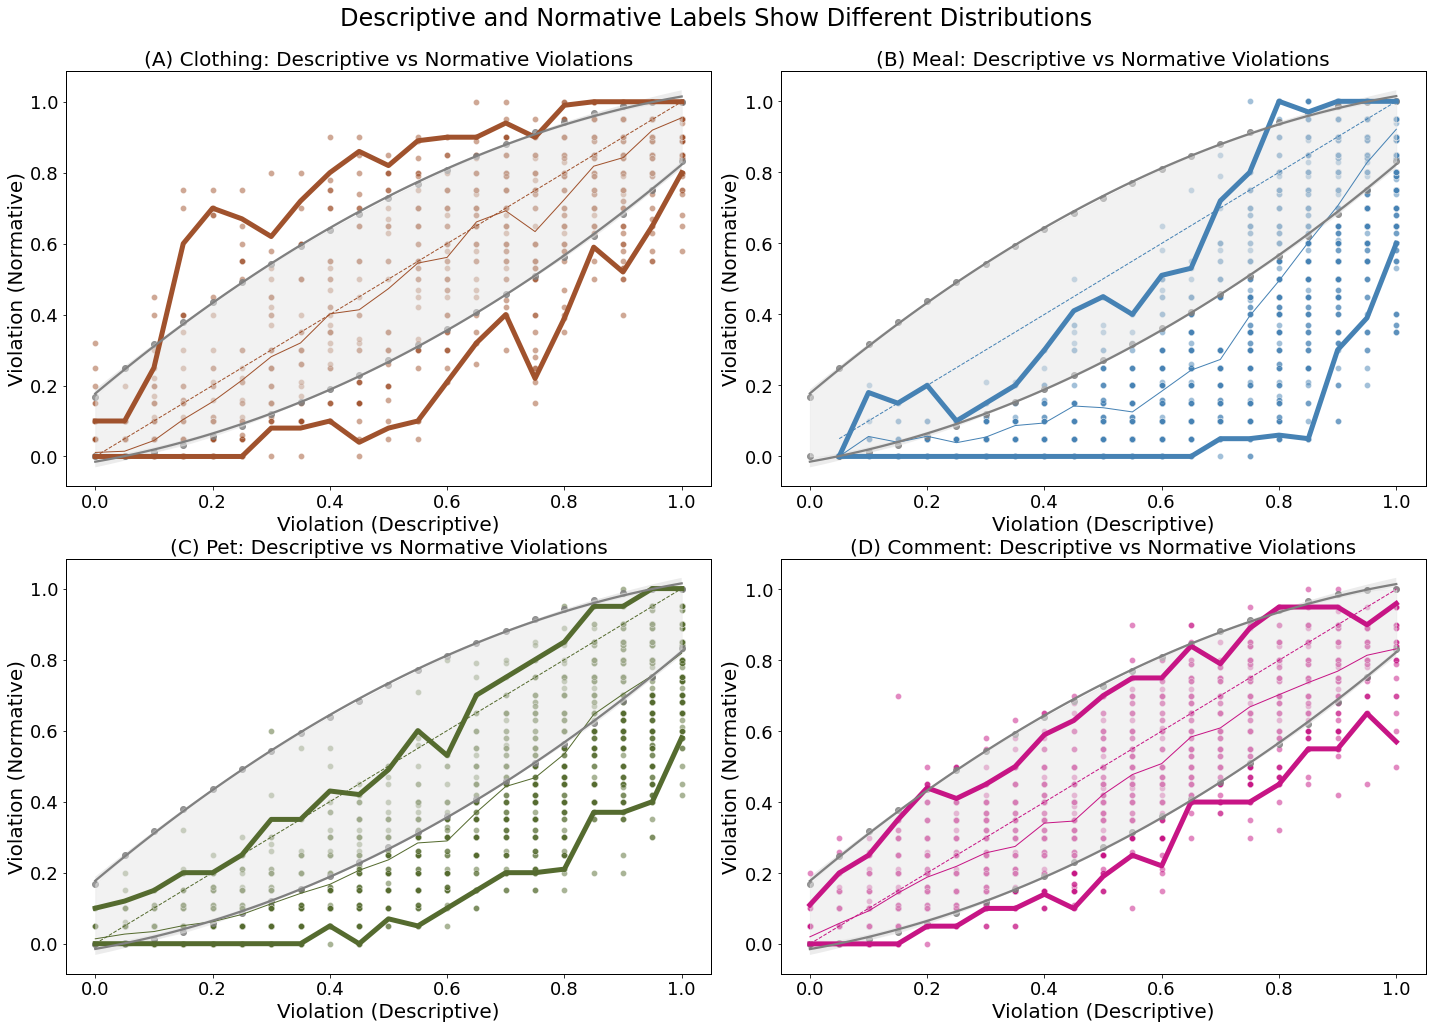

In [4]:
# choosing error type, options are:
# "All Error","Superfluous","Missing"
from statsmodels.stats.proportion import proportion_confint
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# sns.set(font_scale = 1.5)
model_names = ['resnet50','resnet50','alexnet','resnet18','resnet50','squeezenet']
dataset_list = ['../../../data_dir/dress/{}_labels.csv',
                '../../../data_dir/meal/{}_labels.csv',
                '../../../data_dir/pet/{}_labels.csv',
               '../../../data_dir/toxicity/{}_labels.csv']
title_dict = {}
title_dict[dataset_list[0]] = '(A) Clothing: Descriptive vs Normative Violations'
title_dict[dataset_list[1]] = '(B) Meal: Descriptive vs Normative Violations'
title_dict[dataset_list[2]] = '(C) Pet: Descriptive vs Normative Violations'
title_dict[dataset_list[3]] = '(D) Comment: Descriptive vs Normative Violations'


df_curr = pd.read_csv(dataset_list[2].format('descriptive'))
df_curr = df_curr.groupby('imgname').mean()
df_step = df_curr.groupby('descriptive0').mean().reset_index()
df_step['binom_first'] = df_step.apply(
    lambda row: proportion_confint(
    int(row['descriptive0']*20),20,
    0.05,method='beta')[0], axis=1)
df_step['binom_second'] = df_step.apply(
    lambda row: proportion_confint(
    int(row['descriptive0']*20),20,
    0.05,method='beta')[-1], axis=1)
df_step = df_step[['descriptive0','binom_first','binom_second']]

# contention level of samples in TEST set
fig, axs = plt.subplots(2,2,figsize=(20,15))
axs = np.array(axs).reshape(1,4)
i=0
cat=0
color_p='dark'
colors_all=['sienna','steelblue','darkolivegreen','mediumvioletred']
for i,dataset in enumerate(dataset_list):
    df_descr = pd.read_csv(dataset.format('descriptive'))
    df_norm = pd.read_csv(dataset.format('normative'))
    
    df_descr = df_descr.groupby('imgname').mean().reset_index()
    df_descr['descriptive0']=df_descr['descriptive0'].round(2)
    if i==0:
        # NB: Rounding to nearest 0.05. Need to do only for this dataset because all others have exactly
        # 20 labels per object
        df_descr['descriptive0']=df_descr.apply(lambda row: round_to_multiple(row['descriptive0'],5),axis=1)
    df_norm = df_norm.groupby('imgname').mean().reset_index()
    df_norm['normative0']=df_norm['normative0'].round(2)
    df_curr = df_descr[['imgname','descriptive0']].merge(
        df_norm[['imgname','normative0']],on='imgname'
    )
    df_curr = df_curr.round(2)
    
    df_curr['hue']=0
    df_curr['diff'] = df_curr['descriptive{}'.format(cat)].values - df_curr['normative{}'.format(cat)].values
    df_mean = df_curr.groupby('descriptive{}'.format(cat)).mean().reset_index()
    df_25 = df_curr.groupby('descriptive{}'.format(cat)).quantile(0.025).round(2).reset_index()
    df_75 = df_curr.groupby('descriptive{}'.format(cat)).quantile(0.975).round(2).reset_index()
    sns.scatterplot(y='normative{}'.format(cat), 
                  x='descriptive{}'.format(cat), 
                  ax=axs[0][i],
                  alpha=0.5,
                  color=colors_all[i],
                  data=df_curr)
    sns.lineplot(x='descriptive{}'.format(cat), y='normative{}'.format(cat), 
                    ax=axs[0][i],
                    color=colors_all[i],
                data=df_mean,
                linewidth=1,
               )
    sns.lineplot(x='descriptive{}'.format(cat), y='normative{}'.format(cat), 
                    ax=axs[0][i],
                    color=colors_all[i],
                data=df_25,
                linewidth=5,
               )
    sns.lineplot(x='descriptive{}'.format(cat), y='normative{}'.format(cat), 
                    ax=axs[0][i],
                    color=colors_all[i],
                data=df_75,
                linewidth=5,
               )
    sns.lineplot(x='descriptive{}'.format(cat), y='descriptive{}'.format(cat), 
                    ax=axs[0][i],
                    color=colors_all[i],
                data=df_mean,
                linewidth=1,
                linestyle='--'
               )

#     axs[0][i].scatter(x=df_curr['descriptive{}'.format(cat)].values,
#                      y=df_curr['normative{}'.format(cat)].values,color='black')
    
    
    x = df_step['descriptive0'].values
    y = df_step['binom_first'].values
    y1 = df_step['binom_second'].values

    sns.regplot(x=df_step['descriptive0'].values,y=y,color='gray',ax=axs[0][i],order=2)
    sns.regplot(x=np.arange(len(y))/20,y=y1,color='gray',ax=axs[0][i],order=2)

    axs[0][i].fill_between(np.arange(len(y))/20, y, y1, color=adjust_lightness('gray',1.8),alpha=0.5)#gainsboro
    print(y,y1)

#     axs[0][i].set_ylim([0,1.1])
    axs[0][i].set_title(title_dict[dataset],fontsize=20)
    axs[0][i].set_xlabel('Violation (Descriptive)', fontsize=20)
    axs[0][i].set_ylabel('Violation (Normative)', fontsize=20)
    axs[0][i].tick_params(axis = 'both', which = 'major', labelsize = 18)

for ax in axs[0]: # Loop directly on the flattened axes 
    for _,spine in ax.spines.items():
        spine.set_visible(True) # You have to first turn them on
        spine.set_color('black')
        spine.set_linewidth(1)

plt.tight_layout()

fig.subplots_adjust(top=0.89)
st=plt.suptitle('Descriptive and Normative Labels Show Different Distributions',fontsize=24)
# shift subplots down:
st.set_y(0.95)
import string

plt.savefig('../Figure4bv2.png',dpi=600)
